# Hadi Babalou - 810199380

Artificial Intelligence - CA#03: *Game* - Spring 2023 \
In this notebook, we are going to implement a naive baise classifier to classify the given dataset. The dataset contains pictures of hand-written persian digits.

In [90]:
import pickle

DATA_PATH = 'data.pkl'
LABEL_PATH = 'label.pkl'
NUM_OF_CLASSES = 10

data_file = open(DATA_PATH, 'rb')
label_file = open(LABEL_PATH, 'rb')

data = pickle.load(data_file)
label = pickle.load(label_file)

data_file.close()
label_file.close()

## Examining and Preprocessing the Data

First, we need to divide the dataset into two parts: train and test. We use the train part to train our model and the test part to evaluate the model. 

it's important to choose an appropriate ratio that allows for sufficient training of the model while also evaluating its performance on unseen data. 

The choice of the ratio depends on the size of the dataset. As a rule of thumb, a common split is to use 70% of the data for training and 30% for testing. However, if you have a large dataset, you may be able to use a smaller percentage for testing. 

It's also important to ensure that the data is split randomly, so that the training and testing sets are representative of the overall dataset. This can be done using techniques such as stratified sampling or k-fold cross-validation to ensure that the data is split in a way that preserves the distribution of the classes. 

Overall, the best ratio for dividing the data will depend on the specifics of your dataset and the goals of your analysis. It's important to experiment with different ratios and evaluate the performance of the model on both the training and testing sets to determine the optimal split.

In [91]:
from sklearn.utils import shuffle

TRAIN_RATIO = 0.8
TEST_RATIO = 0.2

data, label = shuffle(data, label, random_state=0)

train_data = data[:int(len(data) * TRAIN_RATIO)]
train_label = label[:int(len(label) * TRAIN_RATIO)]

test_data = data[int(len(data) * TRAIN_RATIO):]
test_label = label[int(len(label) * TRAIN_RATIO):]


You can see a sample of the dataset below. 

Also ```min``` and ```max``` values for each feature - which are the pixel values - are shown below.

min: 0
max: 255


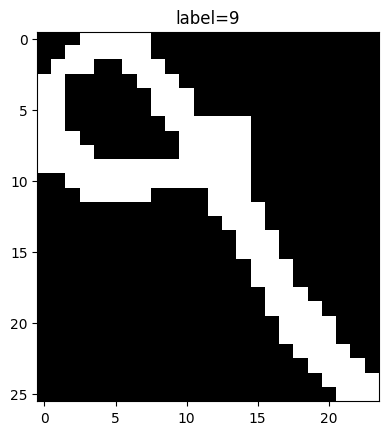

In [92]:
import matplotlib.pyplot as plt
import random

index = random.randint(0, len(train_data))
plt.imshow(train_data[index], cmap='gray')
plt.title("label=" + str(train_label[index]))

min = float('inf')
max = float('-inf')
for i in range(len(train_data)):
    for j in range(len([train_data[i]])):
        for k in range(len(train_data[i][j])):
            if train_data[i][j][k] > max:
                max = train_data[i][j][k]
            elif train_data[i][j][k] < min:
                min = train_data[i][j][k]

print("min:", min)
print("max:", max)


It is generally a good idea to make the size of all pictures the same during preprocessing when training a machine learning model because it ensures that the input data has a consistent format, which can make the model training process more efficient and effective. Here are a few reasons why:

1. ```Standardization```: By resizing all images to the same size, you are standardizing the input data, which makes it easier to process and analyze. This ensures that the model sees consistent input data during training and avoids any variations in size that may negatively impact model performance.

2. ```Memory Efficiency```: Having a consistent size of images allows the model to store the input data in a uniform format. This can help to reduce the memory usage and computational resources needed to process the images during training.

3. ```Improved Accuracy```: When images are of different sizes, the model may not be able to extract important features or patterns from the image data. Resizing the images to a uniform size can help ensure that all important features are captured and provide a more accurate representation of the image data.

4. ```Consistent Training```: By having consistent input data, the model can be trained more consistently and accurately, which can lead to better performance and more accurate predictions.

In this notebook, we are going to resize all images to $ IMAGE\_WIDTH \times IMAGE\_HEIGHT $ pixels using ```cv2.resize``` function. You can see a sample of the resized dataset below.

In [93]:
import numpy as np
import pandas as pd
import cv2

IMAGE_WIDTH = 20
IMAGE_HEIGHT = 20
IMAGE_SIZE = IMAGE_WIDTH * IMAGE_HEIGHT
IMAGE_SHAPE = (IMAGE_WIDTH, IMAGE_HEIGHT)

for i in range(len(train_data)):
    train_data[i] = cv2.resize(train_data[i], IMAGE_SHAPE, interpolation=cv2.INTER_AREA)

for i in range(len(test_data)):
    test_data[i] = cv2.resize(test_data[i], IMAGE_SHAPE, interpolation=cv2.INTER_AREA)


Text(0.5, 1.0, 'label=2')

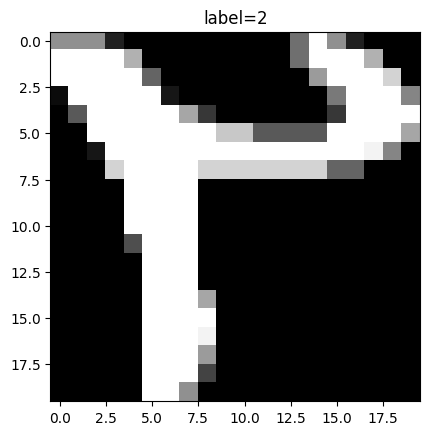

In [94]:
index = random.randint(0, len(train_data))
plt.imshow(train_data[index], cmap='gray')
plt.title("label=" + str(train_label[index]))

In [95]:
def print_image(image, label):
    for i in range(IMAGE_WIDTH):
        for j in range(IMAGE_HEIGHT):
            if image[i][j] > 0.5:
                print (label, end="")
            else:
                print(" ", end="")
        print()

index = random.randint(0, len(train_data))
print_image(train_data[index], train_label[index])

     666            
   66666         666
  6666         66666
 6666          6666 
66666         66666 
6666        666666  
66666  66 6666666   
6666666666666666    
 666666666666666    
          66666     
          6666      
         66666      
         6666       
        66666       
        6666        
        6666        
       6666         
       6666         
       666          
       66           


You can see a sample of each class below.

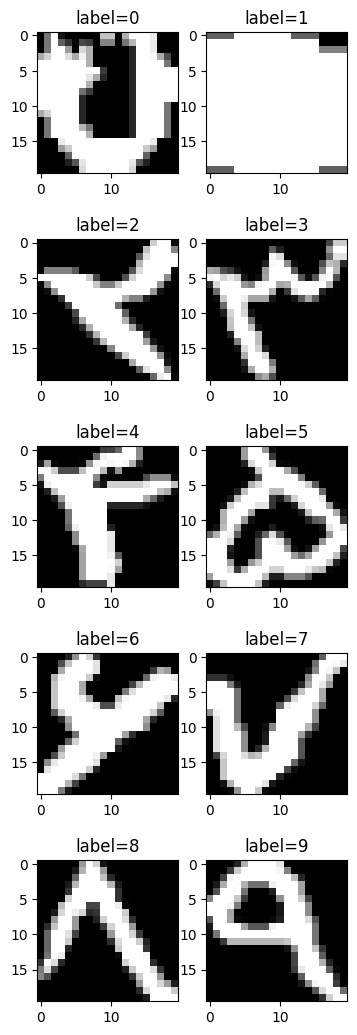

In [96]:
fig = plt.figure(figsize=(4, 13))
rows = 5
columns = 2

for i in range(NUM_OF_CLASSES):
    for j in range(len(train_data)):
        if train_label[j] == i:
            fig.add_subplot(rows, columns, i+1)
            plt.imshow(train_data[j], cmap='gray')
            plt.title("label=" + str(i))
            break

In the following plots, you can see the number of samples for each class in the train and test sets.

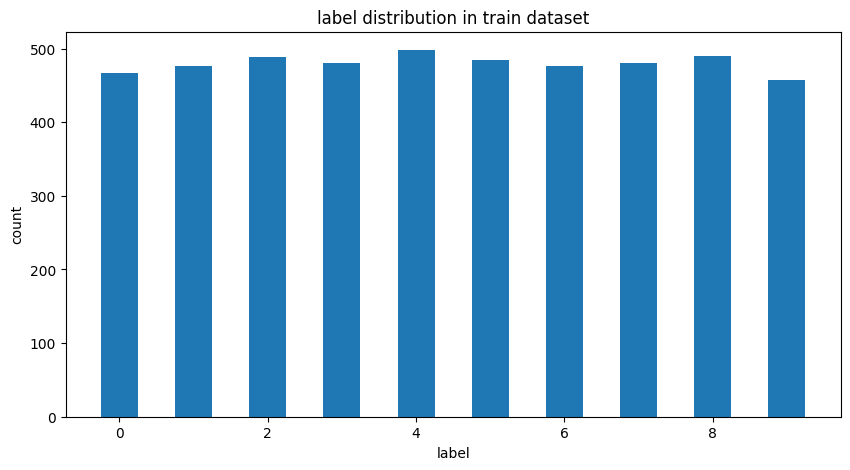

In [97]:
train_unique, train_counts = np.unique(np.array(train_label), return_counts=True)

fig = plt.figure(figsize=(10, 5))
plt.bar(train_unique, train_counts, width=0.5)
plt.xlabel("label")
plt.ylabel("count")
plt.title("label distribution in train dataset")
plt.show()

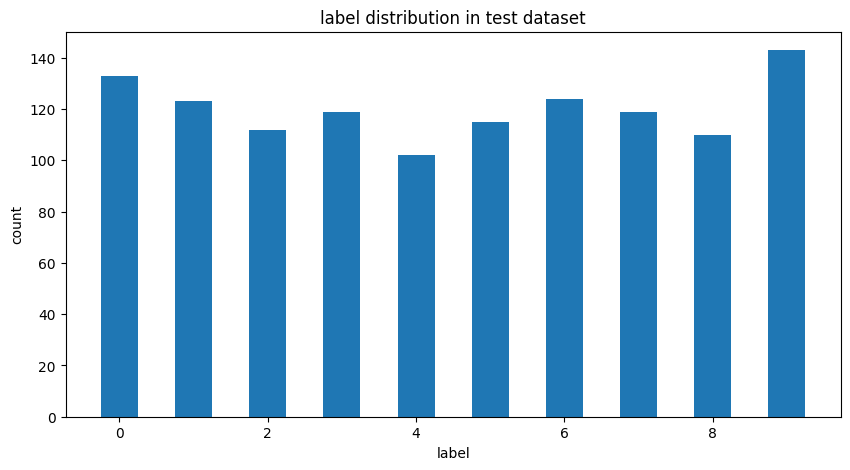

In [98]:
test_unique, test_counts = np.unique(np.array(test_label), return_counts=True)

fig = plt.figure(figsize=(10, 5))
plt.bar(test_unique, test_counts, width=0.5)
plt.xlabel("label")
plt.ylabel("count")
plt.title("label distribution in test dataset")
plt.show()

In the end of preprocessing, we normalize the data by dividing each pixel value by ```max-min``` which in this case is ```255```. This will make the model converge faster.

Normalizing pixel values to be between 0 and 1 is an important preprocessing step in many machine learning tasks, especially in computer vision tasks such as image classification. It can help to avoid issues with weight updates, improve model performance, and make it easier to compare images with different pixel value ranges. 

If we don't normalize the data, some problems may occur. For example, the model may focus on the differences between the pixel values instead of the actual features in the image. This can lead to poor feature learning and poor model performance.

In [99]:
for i in range(len(train_data)):
    train_data[i] = train_data[i] / (max - min)

for i in range(len(test_data)):
    test_data[i] = test_data[i] / (max - min)

## Naive Baise Classifier

In naive Bayes, the classification problem is framed as predicting the class label of an input instance based on its feature values. The algorithm assumes that the features are independent of each other, hence the term "naive". This assumption simplifies the calculation of the probability of a particular class given the feature values, making it computationally efficient.

Naive Bayes works by first calculating the prior probability of each class based on its frequency in the training data. Then, for each feature value, it calculates the likelihood of that feature value given each class using a probability density function or a frequency count. Finally, it combines the prior probabilities and the likelihoods to calculate the posterior probability of each class given the feature values using Bayes' theorem. The class with the highest posterior probability is selected as the predicted class label.

Naive Bayes is commonly used in text classification, spam filtering, sentiment analysis, and other applications where the features are categorical or continuous variables. Despite its simplicity and strong independence assumptions, naive Bayes has been shown to perform well in practice and can be a useful baseline algorithm for classification tasks.

$$ P(c|X) = \frac{P(X|c)P(c)}{P(X)} $$

In the above equation, $c$ is the class label, $X$ is the feature vector, $P(c|X)$ is the posterior probability of class $c$ given the feature vector $X$, $P(X|c)$ is the likelihood of the feature vector $X$ given class $c$, $P(c)$ is the prior probability of class $c$, and $P(X)$ is the probability of the feature vector $X$.

As we only need to find the class with the highest posterior probability, we can ignore the denominator $P(X)$ and focus on the numerator $P(X|c)P(c)$. This is known as the maximum a posteriori (MAP) estimate.

Also $P(X|c)$ can be written as $P(x_1|c)P(x_2|c)...P(x_n|c)$ where $x_i$ is the $i$ th feature of the feature vector $X$, because we assume that the features are independent of each other. This is known as the naive Bayes assumption. so we can write: 

$$ P(c|X) = P(x_1|c)P(x_2|c)...P(x_n|c)P(c) $$

In this particular problem, each feature is a pixel value and each class is a digit. So:
* Posterior probability is the probability of a digit given the pixel values of an image.
* Prior probability is the probability of a digit in the dataset.
* Likelihood is the probability of a pixel value given a digit.
* Evidence is the probability of a image.

We can calculate the prior probability of each class by dividing the number of samples in each class by the total number of samples in the dataset.

In [100]:
prior = [train_counts[i]/len(train_data) for i in range(NUM_OF_CLASSES)]


In this notebook, we are going to implement ```Gaussian Naive Baise``` and ```Bernoulli Naive Baise``` classifiers. 

They are both based on the naive Bayes assumption, but they differ in how they model the likelihood of the feature values given the class.

In Gaussian Naive Baise, the likelihood of the feature values is modeled using a Gaussian distribution. This means that the feature values are assumed to be normally distributed around the mean value for each class. The parameters of the Gaussian distribution are estimated from the training data using maximum likelihood estimation.

In Bernoulli Naive Baise, the likelihood of the feature values is modeled using a Bernoulli distribution. This means that the feature values are assumed to be binary variables that are either 0 or 1. The parameters of the Bernoulli distribution are estimated from the training data using maximum likelihood estimation.

We need to calculate mean and standard deviation for each feature in each class for Gaussian Naive Baise.

In [101]:
import math

# first we need to calculate the mean of each feature in each class
sums = np.zeros((NUM_OF_CLASSES, IMAGE_WIDTH, IMAGE_HEIGHT))
for i in range(len(train_data)):
    for j in range(len(train_data[i])):
        for k in range(len(train_data[i][j])):
            sums[train_label[i]][j][k] += train_data[i][j][k]

means = [sums[i]/train_counts[i] for i in range(NUM_OF_CLASSES)]

# now we should calculate variances
variances = np.zeros((NUM_OF_CLASSES, IMAGE_WIDTH, IMAGE_HEIGHT))
for i in range(len(train_data)):
    for j in range(IMAGE_WIDTH):
        for k in range(IMAGE_HEIGHT):
            variances[train_label[i]][j][k] += (train_data[i][j][k] - means[train_label[i]][j][k])**2

variances = [variances[i]/train_counts[i] for i in range(NUM_OF_CLASSES)]


Also we need to calculate the probability of each pixel being on or off for each class for Bernoulli Naive Baise.

In [102]:
probabilities = np.zeros((NUM_OF_CLASSES, IMAGE_WIDTH, IMAGE_HEIGHT))
for i in range(len(train_data)):
    for j in range(IMAGE_WIDTH):
        for k in range(IMAGE_HEIGHT):
            xi = 1 if train_data[i][j][k] > 0.5 else 0
            probabilities[train_label[i]][j][k] += xi

probabilities = [probabilities[i]/train_counts[i] for i in range(NUM_OF_CLASSES)]

You can see an average image for each class below.

In [103]:
for digit in range(NUM_OF_CLASSES): 
    print_image(probabilities[digit], digit)
    print()
    print("=====================================")
    print()
            

       00000000     
      0000000000    
    0000000000000   
   000000000000000  
  00000000000000000 
  00000000000000000 
 0000000000000000000
00000000000000000000
000000000   00000000
00000000     0000000
00000000     0000000
00000000    00000000
000000000  000000000
0000000000000000000 
000000000000000000  
 00000000000000000  
  000000000000000   
   0000000000000    
    0000000000      
     00000000       


  11111             
1111111111          
11111111111         
111111111111        
  1111111111        
   1111111111       
   11111111111      
   11111111111      
    11111111111     
    111111111111    
     11111111111    
      11111111111   
      11111111111   
       1111111111   
        1111111111  
        1111111111  
         1111111111 
          1111111111
           111111111
              1111  


                222 
               22222
22222          22222
222222        22222 
 222222     222222  
 2222222222222222   
  22222222222       
   222222

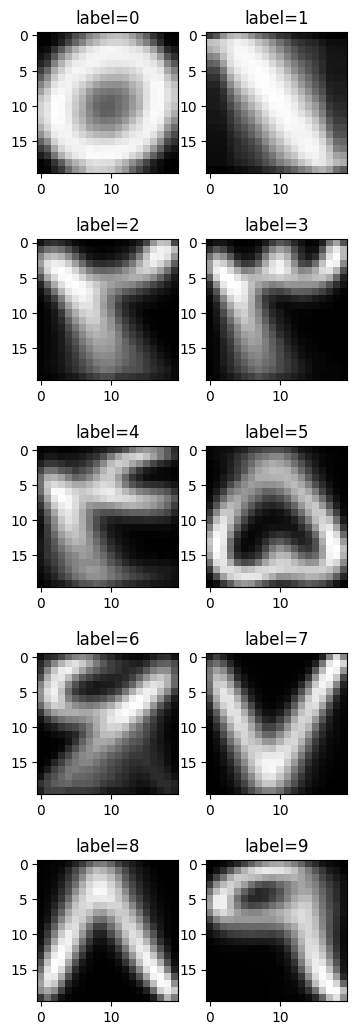

In [104]:
fig = plt.figure(figsize=(4, 13))
rows = 5
columns = 2

for digit in range(NUM_OF_CLASSES):
    fig.add_subplot(rows, columns, digit+1)
    plt.imshow(probabilities[digit], cmap='gray')
    plt.title("label=" + str(digit))

### Gaussian Naive Baise

In Gaussian Naive Baise, the likelihood of the feature values is calculated using the probability density function of a Gaussian distribution. The parameters of the Gaussian distribution are estimated from the training data using maximum likelihood estimation.
$$ P(x_i|c) = \frac{1}{\sqrt{2\pi\sigma^{2}_{c}}}e^{-\frac{(x_i-\mu_{c})^2}{2\sigma^{2}_{c}}} $$

As you can see, if the variance of the Gaussian distribution be zero, we will have division by zero. so we add a small value to the variance to avoid this problem. This is known as ```Laplace smoothing```.

In [105]:
SMOOTHING_EPSILON = 0.0001
variances = [variances[i] + SMOOTHING_EPSILON for i in range(NUM_OF_CLASSES)]

Now we can calculate the posterior probability of each class given the feature vector $X$ using the naive Bayes assumption and the maximum a posteriori (MAP) estimate.

As you can see, we have a product of probabilities in the above equation. This can lead to underflow issues when the number of features is large. To avoid this problem, we can take the logarithm of the posterior probability and use the sum of logarithms instead of the product of probabilities.


Also if we have a feature value that is not in the training data, the likelihood of that feature value given a class will be zero. This will cause the posterior probability to be zero. To avoid this problem, we use smoothing techniques. 

There are several types of smoothing techniques, including:

1.  Laplace smoothing: Laplace smoothing, also known as additive smoothing, is a technique used to smooth categorical data by adding a small constant value to the count of each category. This helps to avoid zero probabilities and ensures that the estimated probabilities are non-zero for all categories.

2.  Lidstone smoothing: Lidstone smoothing is a generalization of Laplace smoothing that allows for a larger smoothing parameter. The parameter can be any real number between 0 and 1, where 0 corresponds to no smoothing and 1 corresponds to Laplace smoothing.

3.  Kernel smoothing: Kernel smoothing is a technique used to smooth continuous data by averaging nearby data points using a kernel function. The kernel function assigns weights to each data point based on its distance from the point being estimated. This technique is commonly used in density estimation and non-parametric regression.

4.  Moving average smoothing: Moving average smoothing is a technique used to smooth time-series data by calculating the average of a window of adjacent data points. The size of the window is a parameter that can be adjusted to control the amount of smoothing.

5.  Exponential smoothing: Exponential smoothing is a technique used to smooth time-series data by assigning exponentially decreasing weights to past observations. The weights decrease exponentially with the age of the observation, with more recent observations having a higher weight.


In [106]:
# now we should calculate the likelihood of each class
likelihood_gaussian_with_smoothing = np.zeros((len(test_data), NUM_OF_CLASSES))
likelihood_gaussian_without_smoothing = np.zeros((len(test_data), NUM_OF_CLASSES))

# first we initialize likelihood with prior probabillities
for i in range(len(test_data)):
    for j in range(NUM_OF_CLASSES):
        likelihood_gaussian_with_smoothing[i][j] = math.log10(prior[j])
        likelihood_gaussian_without_smoothing[i][j] = math.log10(prior[j])

TERM_EPSILON = 1e-99

# now we calculate the likelihood
for i in range(len(test_data)):
    for j in range(NUM_OF_CLASSES):
        for k in range(IMAGE_WIDTH):
            for l in range(IMAGE_HEIGHT):

                constant = 1 / np.sqrt(2 * np.pi * variances[j][k][l])
                numerator = (test_data[i][k][l] - means[j][k][l]) ** 2
                denominator = 2 * variances[j][k][l]
                term = math.log10(constant) - numerator / denominator
                likelihood_gaussian_without_smoothing[i][j] += term

                # smoothing
                if term < math.log10(TERM_EPSILON):
                    term = math.log10(TERM_EPSILON)
                likelihood_gaussian_with_smoothing[i][j] += term


You can see a sample image, its predicted class label, its true class label, and its corresponding posterior probabilities below.

digit 0 probability = 0.0
digit 1 probability = 2.9211998042036595e-287
digit 2 probability = 0.0
digit 3 probability = 0.0
digit 4 probability = 0.0
digit 5 probability = 2.3774059545135105e-305
digit 6 probability = 1.3026348193978414e-150
digit 7 probability = 0.0
digit 8 probability = 4.3236358157718973e-302
digit 9 probability = 1.0


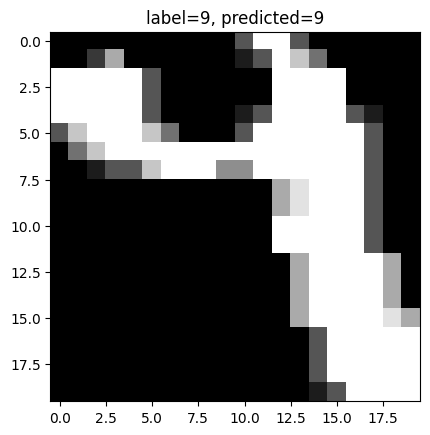

In [107]:
index = random.randint(0, len(test_data))
plt.imshow(test_data[index], cmap='gray')
plt.title("label=" + str(test_label[index]) + ", predicted=" + str(np.argmax(likelihood_gaussian_with_smoothing[index])))    

sample_probabilities = np.exp(likelihood_gaussian_with_smoothing[index])
sample_probabilities = sample_probabilities / np.sum(sample_probabilities)
for i in range(NUM_OF_CLASSES):
    print("digit", i, "probability =", sample_probabilities[i])

### Bernoulli Naive Baise

In Bernoulli Naive Baise, the likelihood of the feature values is calculated using the probability mass function of a Bernoulli distribution. The parameters of the Bernoulli distribution are estimated from the training data using maximum likelihood estimation.
$$ P(x_i|c) = P(x_i|c)^{x_i}(1-P(x_i|c))^{1-x_i} $$

We should use the logarithm of the posterior probability and use the sum of logarithms instead of the product of probabilities to avoid underflow issues. Also we should use smoothing techniques to avoid zero probabilities.

In [108]:
# now we should calculate the likelihood of each class
likelihood_bernoulli_with_smoothing = np.zeros((len(test_data), NUM_OF_CLASSES))
likelihood_bernoulli_without_smoothing = np.zeros((len(test_data), NUM_OF_CLASSES))

# first we initialize likelihood with prior probabillities
for i in range(len(test_data)):
    for j in range(NUM_OF_CLASSES):
        likelihood_bernoulli_with_smoothing[i][j] = math.log10(prior[j])
        likelihood_bernoulli_without_smoothing[i][j] = math.log10(prior[j])

LOG_DOMAIN_EPSILON = 1e-129
TERM_EPSILON = 1e-99

# now we calculate the likelihood
for i in range(len(test_data)):
    for j in range(NUM_OF_CLASSES):
        for k in range(IMAGE_WIDTH):
            for l in range(IMAGE_HEIGHT):
                
                if test_data[i][k][l] > 0.5:
                    if probabilities[j][k][l] < LOG_DOMAIN_EPSILON:
                        term = math.log10(LOG_DOMAIN_EPSILON)
                    else:
                        term = math.log10(probabilities[j][k][l])
                    likelihood_bernoulli_without_smoothing[i][j] += term

                    # smoothing
                    if probabilities[j][k][l] < TERM_EPSILON:
                        term = math.log10(TERM_EPSILON)                        
                    likelihood_bernoulli_with_smoothing[i][j] += term

                else:
                    if 1 - probabilities[j][k][l] < LOG_DOMAIN_EPSILON:
                        term = math.log10(LOG_DOMAIN_EPSILON)
                    else:
                        term = math.log10(1 - probabilities[j][k][l])
                    likelihood_bernoulli_without_smoothing[i][j] += term

                    # smoothing
                    if probabilities[j][k][l] > 1 - TERM_EPSILON:
                        term = math.log10(TERM_EPSILON)
                    likelihood_bernoulli_with_smoothing[i][j] += term


digit 0 probability = 2.3065310174518762e-38
digit 1 probability = 6.827414451307619e-29
digit 2 probability = 3.2115762497759417e-137
digit 3 probability = 4.8920089488896197e-144
digit 4 probability = 2.0135181189883804e-13
digit 5 probability = 3.3189341605717037e-19
digit 6 probability = 3.4640876274112745e-08
digit 7 probability = 0.9999999653589223
digit 8 probability = 0.0
digit 9 probability = 6.948792085305001e-80


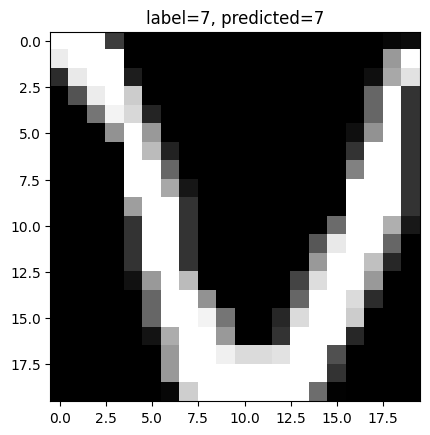

In [109]:
index = random.randint(0, len(test_data))
plt.imshow(test_data[index], cmap='gray')
plt.title("label=" + str(test_label[index]) + ", predicted=" + str(np.argmax(likelihood_bernoulli_with_smoothing[index])))  

sample_probabilities = np.exp(likelihood_bernoulli_with_smoothing[index])
sample_probabilities = sample_probabilities / np.sum(sample_probabilities)
for i in range(NUM_OF_CLASSES):
    print("digit", i, "probability =", sample_probabilities[i])


## Evaluation

### Metrics

We will use 4 metrics to evaluate our classifiers:

$$ Accuracy = \frac{Number\ of\ correct\ predictions}{Total\ number\ of\ predictions} $$

$$ Precision = \frac{Correct\ detections\ of\ a\ class}{Total\ detections\ of\ that\ class} $$

$$ Recall = \frac{Correct\ detections\ of\ a\ class}{Total\ samples\ of\ that\ class} $$

$$ F1\ score = 2 * \frac{Precision * Recall}{Precision + Recall} $$

Precision and recall are useful metrics for evaluating the performance of a model, particularly in binary classification problems where the goal is to predict whether an instance belongs to a positive or negative class. However, they may not be sufficient on their own to fully evaluate the performance of a model for several reasons.

One reason is that precision and recall can be optimized independently of each other, and in some cases, optimizing one may come at the cost of the other. For example, a classifier that always predicts the positive class will have perfect recall but zero precision, while a classifier that always predicts the negative class will have perfect precision but zero recall. In both cases, the overall performance of the model would be poor, but looking at precision or recall alone would give an incomplete picture of the model's performance.

Another reason is that precision and recall do not take into account the relative importance of false positives and false negatives. In some applications, such as medical diagnosis, false negatives may be more harmful than false positives, while in other applications, such as fraud detection, false positives may be more harmful than false negatives. In such cases, additional metrics such as the F1 score or the area under the ROC curve (AUC) may provide a more comprehensive evaluation of the model's performance.

For example, let's say we have a model that predicts whether a customer is likely to buy a product or not. The model has a precision of 80% but a recall of only 20%. This means that the model is good at identifying customers who are likely to buy the product (high precision) but is missing a lot of potential customers who would have bought the product (low recall). In this case, looking at precision alone would suggest that the model is good, but the overall performance of the model would be poor. To get a better understanding of the model's performance, we would need to look at additional metrics such as the F1 score or the AUC.

### F1 Score

The F1 score is a harmonic mean of precision and recall.

The reason why the F1 score uses the harmonic mean instead of other types of means, such as the arithmetic mean, is that it gives more weight to low values. In other words, the F1 score is more sensitive to cases where either precision or recall is low.

The harmonic mean is defined as the reciprocal of the arithmetic mean of the reciprocals of a set of values. The formula for calculating the harmonic mean of n values is:

$$ Harmonic\ mean = \frac{n}{\frac{1}{x_1} + \frac{1}{x_2} + ... + \frac{1}{x_n}} $$

Compared to the arithmetic mean, the harmonic mean gives more weight to low values and less weight to high values. This means that if one of the values in the set is very small, the harmonic mean will be closer to that small value than the arithmetic mean would be. This property makes the harmonic mean a better choice for cases where we want to emphasize the importance of low values, such as in the case of the F1 score.

This is important because in many classification problems, the cost of false positives and false negatives may not be equal, and it is important to consider both precision and recall together to get a comprehensive picture of the model's performance.

### Multi-class Metrics

We will use 3 types of averaging to calculate the metrics for multi-class classification problems:

* **Macro-averaged metrics**: These are metrics that are computed by taking the average of the metric for each class. For example, the macro-averaged precision is the average of the precision for each class. This approach treats each class equally, regardless of its frequency or importance.

* **Micro-averaged metrics**: These are metrics that are computed by aggregating the true positives, false positives, and false negatives across all classes, and then computing the metric. For example, the micro-averaged precision is the number of true positives across all classes divided by the number of instances classified as positive across all classes. This approach treats each instance equally, regardless of its class.

* **Weighted-average metrics**: These are metrics that are computed by taking the weighted average of the metric for each class, where the weight is the number of instances in each class. For example, the weighted-average precision is the average of the precision for each class, weighted by the number of instances in each class.

### Calculating Metrics

#### Without Smoothing

In [128]:
gaussian_correct_detected_without_smoothing = np.zeros(NUM_OF_CLASSES)
bernoulli_correct_detected_without_smoothing = np.zeros(NUM_OF_CLASSES)

actual_in_class = np.zeros(NUM_OF_CLASSES)
gaussian_detected_in_class_without_smoothing = np.zeros(NUM_OF_CLASSES)
bernoulli_detected_in_class_without_smoothing = np.zeros(NUM_OF_CLASSES)

gaussian_wrong_detected_without_smoothing = []
bernoulli_wrong_detected_without_smoothing = []

for i in range(len(test_data)):
    actual_label = test_label[i]
    gaussian_predicted_label = np.argmax(likelihood_gaussian_without_smoothing[i])
    bernoulli_predicted_label = np.argmax(likelihood_bernoulli_without_smoothing[i])
    
    actual_in_class[actual_label] += 1
    gaussian_detected_in_class_without_smoothing[gaussian_predicted_label] += 1
    bernoulli_detected_in_class_without_smoothing[bernoulli_predicted_label] += 1

    if gaussian_predicted_label == actual_label:
        gaussian_correct_detected_without_smoothing[gaussian_predicted_label] += 1
    
    if bernoulli_predicted_label == actual_label:
        bernoulli_correct_detected_without_smoothing[gaussian_predicted_label] += 1

    if gaussian_predicted_label != actual_label:
        gaussian_wrong_detected_without_smoothing.append((i, gaussian_predicted_label, actual_label))

    if bernoulli_predicted_label != actual_label:
        bernoulli_wrong_detected_without_smoothing.append((i, bernoulli_predicted_label, actual_label))

    

In [129]:
gaussian_accuracy_without_smoothing = np.sum(gaussian_correct_detected_without_smoothing) / np.sum(actual_in_class)
bernoulli_accuracy_without_smoothing = np.sum(bernoulli_correct_detected_without_smoothing) / np.sum(actual_in_class)

gaussian_precision_per_class_without_smoothing = gaussian_correct_detected_without_smoothing / gaussian_detected_in_class_without_smoothing
bernoulli_precision_per_class_without_smoothing = bernoulli_correct_detected_without_smoothing / bernoulli_detected_in_class_without_smoothing

gaussian_recall_per_class_without_smoothing = gaussian_correct_detected_without_smoothing / actual_in_class
bernoulli_recall_per_class_without_smoothing = bernoulli_correct_detected_without_smoothing / actual_in_class

gaussian_F1_per_class_without_smoothing = 2 * gaussian_precision_per_class_without_smoothing * gaussian_recall_per_class_without_smoothing / (gaussian_precision_per_class_without_smoothing + gaussian_recall_per_class_without_smoothing)
bernoulli_F1_per_class_without_smoothing = 2 * bernoulli_precision_per_class_without_smoothing * bernoulli_recall_per_class_without_smoothing / (bernoulli_precision_per_class_without_smoothing + bernoulli_recall_per_class_without_smoothing)

In [130]:
gaussian_precision_macro_avg_without_smoothing = np.sum(gaussian_precision_per_class_without_smoothing) / NUM_OF_CLASSES
bernoulli_precision_macro_avg_without_smoothing = np.sum(bernoulli_precision_per_class_without_smoothing) / NUM_OF_CLASSES

gaussian_recall_macro_avg_without_smoothing = np.sum(gaussian_recall_per_class_without_smoothing) / NUM_OF_CLASSES
bernoulli_recall_macro_avg_without_smoothing = np.sum(bernoulli_recall_per_class_without_smoothing) / NUM_OF_CLASSES

gaussian_F1_macro_avg_without_smoothing = np.sum(gaussian_F1_per_class_without_smoothing) / NUM_OF_CLASSES
bernoulli_F1_macro_avg_without_smoothing = np.sum(bernoulli_F1_per_class_without_smoothing) / NUM_OF_CLASSES


In [131]:
gaussian_precision_micro_avg_without_smoothing = np.sum(gaussian_correct_detected_without_smoothing) / np.sum(gaussian_detected_in_class_without_smoothing)
bernoulli_precision_micro_avg_without_smoothing = np.sum(bernoulli_correct_detected_without_smoothing) / np.sum(bernoulli_detected_in_class_without_smoothing)

gaussian_recall_micro_avg_without_smoothing = np.sum(gaussian_correct_detected_without_smoothing) / np.sum(actual_in_class)
bernoulli_recall_micro_avg_without_smoothing = np.sum(bernoulli_correct_detected_without_smoothing) / np.sum(actual_in_class)

gaussian_F1_micro_avg_without_smoothing = 2 * gaussian_precision_micro_avg_without_smoothing * gaussian_recall_micro_avg_without_smoothing / (gaussian_precision_micro_avg_without_smoothing + gaussian_recall_micro_avg_without_smoothing)
bernoulli_F1_micro_avg_without_smoothing = 2 * bernoulli_precision_micro_avg_without_smoothing * bernoulli_recall_micro_avg_without_smoothing / (bernoulli_precision_micro_avg_without_smoothing + bernoulli_recall_micro_avg_without_smoothing)


In [132]:
gaussian_precision_wighted_avg_without_smoothing = np.sum(gaussian_precision_per_class_without_smoothing * actual_in_class) / np.sum(actual_in_class)
bernoulli_precision_wighted_avg_without_smoothing = np.sum(bernoulli_precision_per_class_without_smoothing * actual_in_class) / np.sum(actual_in_class)

gaussian_recall_wighted_avg_without_smoothing = np.sum(gaussian_recall_per_class_without_smoothing * actual_in_class) / np.sum(actual_in_class)
bernoulli_recall_wighted_avg_without_smoothing = np.sum(bernoulli_recall_per_class_without_smoothing * actual_in_class) / np.sum(actual_in_class)

gaussian_F1_wighted_avg_without_smoothing = np.sum(gaussian_F1_per_class_without_smoothing * actual_in_class) / np.sum(actual_in_class)
bernoulli_F1_wighted_avg_without_smoothing = np.sum(bernoulli_F1_per_class_without_smoothing * actual_in_class) / np.sum(actual_in_class)

#### With Smoothing

In [133]:
gaussian_correct_detected_with_smoothing = np.zeros(NUM_OF_CLASSES)
bernoulli_correct_detected_with_smoothing = np.zeros(NUM_OF_CLASSES)

gaussian_wrong_detected_with_smoothing = []
bernoulli_wrong_detected_with_smoothing = []

actual_in_class = np.zeros(NUM_OF_CLASSES)
gaussian_detected_in_class_with_smoothing = np.zeros(NUM_OF_CLASSES)
bernoulli_detected_in_class_with_smoothing = np.zeros(NUM_OF_CLASSES)

for i in range(len(test_data)):
    actual_label = test_label[i]
    gaussian_predicted_label = np.argmax(likelihood_gaussian_with_smoothing[i])
    bernoulli_predicted_label = np.argmax(likelihood_bernoulli_with_smoothing[i])
    
    actual_in_class[actual_label] += 1
    gaussian_detected_in_class_with_smoothing[gaussian_predicted_label] += 1
    bernoulli_detected_in_class_with_smoothing[bernoulli_predicted_label] += 1

    if gaussian_predicted_label == actual_label:
        gaussian_correct_detected_with_smoothing[gaussian_predicted_label] += 1
    
    if bernoulli_predicted_label == actual_label:
        bernoulli_correct_detected_with_smoothing[gaussian_predicted_label] += 1

    if gaussian_predicted_label != actual_label:
        gaussian_wrong_detected_with_smoothing.append((i, gaussian_predicted_label, actual_label))

    if bernoulli_predicted_label != actual_label:
        bernoulli_wrong_detected_with_smoothing.append((i, bernoulli_predicted_label, actual_label))



In [134]:
gaussian_accuracy_with_smoothing = np.sum(gaussian_correct_detected_with_smoothing) / np.sum(actual_in_class)
bernoulli_accuracy_with_smoothing = np.sum(bernoulli_correct_detected_with_smoothing) / np.sum(actual_in_class)

gaussian_precision_per_class_with_smoothing = gaussian_correct_detected_with_smoothing / gaussian_detected_in_class_with_smoothing
bernoulli_precision_per_class_with_smoothing = bernoulli_correct_detected_with_smoothing / bernoulli_detected_in_class_with_smoothing

gaussian_recall_per_class_with_smoothing = gaussian_correct_detected_with_smoothing / actual_in_class
bernoulli_recall_per_class_with_smoothing = bernoulli_correct_detected_with_smoothing / actual_in_class

gaussian_F1_per_class_with_smoothing = 2 * gaussian_precision_per_class_with_smoothing * gaussian_recall_per_class_with_smoothing / (gaussian_precision_per_class_with_smoothing + gaussian_recall_per_class_with_smoothing)
bernoulli_F1_per_class_with_smoothing = 2 * bernoulli_precision_per_class_with_smoothing * bernoulli_recall_per_class_with_smoothing / (bernoulli_precision_per_class_with_smoothing + bernoulli_recall_per_class_with_smoothing)
    

In [135]:
gaussian_precision_macro_avg_with_smoothing = np.sum(gaussian_precision_per_class_with_smoothing) / NUM_OF_CLASSES
bernoulli_precision_macro_avg_with_smoothing = np.sum(bernoulli_precision_per_class_with_smoothing) / NUM_OF_CLASSES

gaussian_recall_macro_avg_with_smoothing = np.sum(gaussian_recall_per_class_with_smoothing) / NUM_OF_CLASSES
bernoulli_recall_macro_avg_with_smoothing = np.sum(bernoulli_recall_per_class_with_smoothing) / NUM_OF_CLASSES

gaussian_F1_macro_avg_with_smoothing = np.sum(gaussian_F1_per_class_with_smoothing) / NUM_OF_CLASSES
bernoulli_F1_macro_avg_with_smoothing = np.sum(bernoulli_F1_per_class_with_smoothing) / NUM_OF_CLASSES


In [136]:
gaussian_precision_micro_avg_with_smoothing = np.sum(gaussian_correct_detected_with_smoothing) / np.sum(gaussian_detected_in_class_with_smoothing)
bernoulli_precision_micro_avg_with_smoothing = np.sum(bernoulli_correct_detected_with_smoothing) / np.sum(bernoulli_detected_in_class_with_smoothing)

gaussian_recall_micro_avg_with_smoothing = np.sum(gaussian_correct_detected_with_smoothing) / np.sum(actual_in_class)
bernoulli_recall_micro_avg_with_smoothing = np.sum(bernoulli_correct_detected_with_smoothing) / np.sum(actual_in_class)

gaussian_F1_micro_avg_with_smoothing = 2 * gaussian_precision_micro_avg_with_smoothing * gaussian_recall_micro_avg_with_smoothing / (gaussian_precision_micro_avg_with_smoothing + gaussian_recall_micro_avg_with_smoothing)
bernoulli_F1_micro_avg_with_smoothing = 2 * bernoulli_precision_micro_avg_with_smoothing * bernoulli_recall_micro_avg_with_smoothing / (bernoulli_precision_micro_avg_with_smoothing + bernoulli_recall_micro_avg_with_smoothing)


In [137]:
gaussian_precision_wighted_avg_with_smoothing = np.sum(gaussian_precision_per_class_with_smoothing * actual_in_class) / np.sum(actual_in_class)
bernoulli_precision_wighted_avg_with_smoothing = np.sum(bernoulli_precision_per_class_with_smoothing * actual_in_class) / np.sum(actual_in_class)

gaussian_recall_wighted_avg_with_smoothing = np.sum(gaussian_recall_per_class_with_smoothing * actual_in_class) / np.sum(actual_in_class)
bernoulli_recall_wighted_avg_with_smoothing = np.sum(bernoulli_recall_per_class_with_smoothing * actual_in_class) / np.sum(actual_in_class)

gaussian_F1_wighted_avg_with_smoothing = np.sum(gaussian_F1_per_class_with_smoothing * actual_in_class) / np.sum(actual_in_class)
bernoulli_F1_wighted_avg_with_smoothing = np.sum(bernoulli_F1_per_class_with_smoothing * actual_in_class) / np.sum(actual_in_class)


## Results

### Gaussian Naive Baise Without Smoothing

In [138]:
gaussian_results_rows = ['Precision', 'Recall', 'F1-score', 'Accuracy']
gaussian_results_without_smoothing = pd.DataFrame(index=gaussian_results_rows)

for i in range(NUM_OF_CLASSES):
    gaussian_results_without_smoothing.loc['Precision', i] = gaussian_precision_per_class_without_smoothing[i]
    gaussian_results_without_smoothing.loc['Recall', i] = gaussian_recall_per_class_without_smoothing[i]
    gaussian_results_without_smoothing.loc['F1-score', i] = gaussian_F1_per_class_without_smoothing[i]

gaussian_results_without_smoothing.loc['Accuracy', 'All Classes'] = gaussian_accuracy_without_smoothing

display(gaussian_results_without_smoothing)


,0,1,2,3,4,5,6,7,8,9,All Classes
Precision,0.955556,0.880000,0.776699,0.862903,0.858491,0.938053,0.879310,0.937500,1.000000,0.865854,NaN
Recall,0.969925,0.894309,0.714286,0.899160,0.892157,0.921739,0.822581,0.882353,0.927273,0.993007,NaN
F1-score,0.962687,0.887097,0.744186,0.880658,0.875000,0.929825,0.850000,0.909091,0.962264,0.925081,NaN
Accuracy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.895


In [139]:
gaussian_average_results_rows = ['Macro Avg', 'Micro Avg', 'Weighted Avg']
gaussian_average_results_cols = ['Precision', 'Recall', 'F1-score']

gaussian_average_results_without_smoothing = pd.DataFrame(index=gaussian_average_results_rows, columns=gaussian_average_results_cols)

gaussian_average_results_without_smoothing.loc['Macro Avg', 'Precision'] = gaussian_precision_macro_avg_without_smoothing
gaussian_average_results_without_smoothing.loc['Macro Avg', 'Recall'] = gaussian_recall_macro_avg_without_smoothing
gaussian_average_results_without_smoothing.loc['Macro Avg', 'F1-score'] = gaussian_F1_macro_avg_without_smoothing

gaussian_average_results_without_smoothing.loc['Micro Avg', 'Precision'] = gaussian_precision_micro_avg_without_smoothing
gaussian_average_results_without_smoothing.loc['Micro Avg', 'Recall'] = gaussian_recall_micro_avg_without_smoothing
gaussian_average_results_without_smoothing.loc['Micro Avg', 'F1-score'] = gaussian_F1_micro_avg_without_smoothing

gaussian_average_results_without_smoothing.loc['Weighted Avg', 'Precision'] = gaussian_precision_wighted_avg_without_smoothing
gaussian_average_results_without_smoothing.loc['Weighted Avg', 'Recall'] = gaussian_recall_wighted_avg_without_smoothing
gaussian_average_results_without_smoothing.loc['Weighted Avg', 'F1-score'] = gaussian_F1_wighted_avg_without_smoothing

display(gaussian_average_results_without_smoothing)


,Precision,Recall,F1-score
Macro Avg,0.895437,0.891679,0.892589
Micro Avg,0.895,0.895,0.895
Weighted Avg,0.895717,0.895,0.894329


### Gaussian Naive Baise With Smoothing

In [140]:
gaussian_results_rows = ['Precision', 'Recall', 'F1-score', 'Accuracy']
gaussian_results_with_smoothing = pd.DataFrame(index=gaussian_results_rows)

for i in range(NUM_OF_CLASSES):
    gaussian_results_with_smoothing.loc['Precision', i] = gaussian_precision_per_class_with_smoothing[i]
    gaussian_results_with_smoothing.loc['Recall', i] = gaussian_recall_per_class_with_smoothing[i]
    gaussian_results_with_smoothing.loc['F1-score', i] = gaussian_F1_per_class_with_smoothing[i]

gaussian_results_with_smoothing.loc['Accuracy', 'All Classes'] = gaussian_accuracy_with_smoothing

display(gaussian_results_with_smoothing)


,0,1,2,3,4,5,6,7,8,9,All Classes
Precision,0.955556,0.880000,0.776699,0.862903,0.858491,0.938053,0.875000,0.937500,1.000000,0.845238,NaN
Recall,0.969925,0.894309,0.714286,0.899160,0.892157,0.921739,0.790323,0.882353,0.927273,0.993007,NaN
F1-score,0.962687,0.887097,0.744186,0.880658,0.875000,0.929825,0.830508,0.909091,0.962264,0.913183,NaN
Accuracy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.891667


In [141]:
gaussian_average_results_rows = ['Macro Avg', 'Micro Avg', 'Weighted Avg']
gaussian_average_results_cols = ['Precision', 'Recall', 'F1-score']

gaussian_average_results_with_smoothing = pd.DataFrame(index=gaussian_average_results_rows, columns=gaussian_average_results_cols)

gaussian_average_results_with_smoothing.loc['Macro Avg', 'Precision'] = gaussian_precision_macro_avg_with_smoothing
gaussian_average_results_with_smoothing.loc['Macro Avg', 'Recall'] = gaussian_recall_macro_avg_with_smoothing
gaussian_average_results_with_smoothing.loc['Macro Avg', 'F1-score'] = gaussian_F1_macro_avg_with_smoothing

gaussian_average_results_with_smoothing.loc['Micro Avg', 'Precision'] = gaussian_precision_micro_avg_with_smoothing
gaussian_average_results_with_smoothing.loc['Micro Avg', 'Recall'] = gaussian_recall_micro_avg_with_smoothing
gaussian_average_results_with_smoothing.loc['Micro Avg', 'F1-score'] = gaussian_F1_micro_avg_with_smoothing

gaussian_average_results_with_smoothing.loc['Weighted Avg', 'Precision'] = gaussian_precision_wighted_avg_with_smoothing
gaussian_average_results_with_smoothing.loc['Weighted Avg', 'Recall'] = gaussian_recall_wighted_avg_with_smoothing
gaussian_average_results_with_smoothing.loc['Weighted Avg', 'F1-score'] = gaussian_F1_wighted_avg_with_smoothing

display(gaussian_average_results_with_smoothing)


,Precision,Recall,F1-score
Macro Avg,0.892944,0.888453,0.88945
Micro Avg,0.891667,0.891667,0.891667
Weighted Avg,0.892815,0.891667,0.890897


### Bernoulli Naive Baise Without Smoothing

In [142]:
bernoulli_results_rows = ['Precision', 'Recall', 'F1-score', 'Accuracy']
bernoulli_results_without_smoothing = pd.DataFrame(index=bernoulli_results_rows)

for i in range(NUM_OF_CLASSES):
    bernoulli_results_without_smoothing.loc['Precision', i] = bernoulli_precision_per_class_without_smoothing[i]
    bernoulli_results_without_smoothing.loc['Recall', i] = bernoulli_recall_per_class_without_smoothing[i]
    bernoulli_results_without_smoothing.loc['F1-score', i] = bernoulli_F1_per_class_without_smoothing[i]

bernoulli_results_without_smoothing.loc['Accuracy', 'All Classes'] = bernoulli_accuracy_without_smoothing

display(bernoulli_results_without_smoothing)


,0,1,2,3,4,5,6,7,8,9,All Classes
Precision,0.888889,0.911504,0.731481,0.834783,0.884615,0.922414,0.895238,0.880342,0.971429,0.826590,NaN
Recall,0.962406,0.837398,0.705357,0.806723,0.901961,0.930435,0.758065,0.865546,0.927273,1.000000,NaN
F1-score,0.924188,0.872881,0.718182,0.820513,0.893204,0.926407,0.820961,0.872881,0.948837,0.905063,NaN
Accuracy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8725


In [143]:
bernoulli_average_results_rows = ['Macro Avg', 'Micro Avg', 'Weighted Avg']
bernoulli_average_results_cols = ['Precision', 'Recall', 'F1-score']

bernoulli_average_results_without_smoothing = pd.DataFrame(index=bernoulli_average_results_rows, columns=bernoulli_average_results_cols)

bernoulli_average_results_without_smoothing.loc['Macro Avg', 'Precision'] = bernoulli_precision_macro_avg_without_smoothing
bernoulli_average_results_without_smoothing.loc['Macro Avg', 'Recall'] = bernoulli_recall_macro_avg_without_smoothing
bernoulli_average_results_without_smoothing.loc['Macro Avg', 'F1-score'] = bernoulli_F1_macro_avg_without_smoothing

bernoulli_average_results_without_smoothing.loc['Micro Avg', 'Precision'] = bernoulli_precision_micro_avg_without_smoothing
bernoulli_average_results_without_smoothing.loc['Micro Avg', 'Recall'] = bernoulli_recall_micro_avg_without_smoothing
bernoulli_average_results_without_smoothing.loc['Micro Avg', 'F1-score'] = bernoulli_F1_micro_avg_without_smoothing

bernoulli_average_results_without_smoothing.loc['Weighted Avg', 'Precision'] = bernoulli_precision_wighted_avg_without_smoothing
bernoulli_average_results_without_smoothing.loc['Weighted Avg', 'Recall'] = bernoulli_recall_wighted_avg_without_smoothing
bernoulli_average_results_without_smoothing.loc['Weighted Avg', 'F1-score'] = bernoulli_F1_wighted_avg_without_smoothing

display(bernoulli_average_results_without_smoothing)


,Precision,Recall,F1-score
Macro Avg,0.874728,0.869516,0.870312
Micro Avg,0.8725,0.8725,0.8725
Weighted Avg,0.87395,0.8725,0.871225


### Bernoulli Naive Baise With Smoothing

In [144]:
bernoulli_results_rows = ['Precision', 'Recall', 'F1-score', 'Accuracy']
bernoulli_results_with_smoothing = pd.DataFrame(index=bernoulli_results_rows)

for i in range(NUM_OF_CLASSES):
    bernoulli_results_with_smoothing.loc['Precision', i] = bernoulli_precision_per_class_with_smoothing[i]
    bernoulli_results_with_smoothing.loc['Recall', i] = bernoulli_recall_per_class_with_smoothing[i]
    bernoulli_results_with_smoothing.loc['F1-score', i] = bernoulli_F1_per_class_with_smoothing[i]

bernoulli_results_with_smoothing.loc['Accuracy', 'All Classes'] = bernoulli_accuracy_with_smoothing

display(bernoulli_results_with_smoothing)


,0,1,2,3,4,5,6,7,8,9,All Classes
Precision,0.888889,0.911504,0.731481,0.834783,0.884615,0.922414,0.895238,0.880342,0.971429,0.826590,NaN
Recall,0.962406,0.837398,0.705357,0.806723,0.901961,0.930435,0.758065,0.865546,0.927273,1.000000,NaN
F1-score,0.924188,0.872881,0.718182,0.820513,0.893204,0.926407,0.820961,0.872881,0.948837,0.905063,NaN
Accuracy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8725


In [145]:
bernoulli_average_results_rows = ['Macro Avg', 'Micro Avg', 'Weighted Avg']
bernoulli_average_results_cols = ['Precision', 'Recall', 'F1-score']

bernoulli_average_results_with_smoothing = pd.DataFrame(index=bernoulli_average_results_rows, columns=bernoulli_average_results_cols)

bernoulli_average_results_with_smoothing.loc['Macro Avg', 'Precision'] = bernoulli_precision_macro_avg_with_smoothing
bernoulli_average_results_with_smoothing.loc['Macro Avg', 'Recall'] = bernoulli_recall_macro_avg_with_smoothing
bernoulli_average_results_with_smoothing.loc['Macro Avg', 'F1-score'] = bernoulli_F1_macro_avg_with_smoothing

bernoulli_average_results_with_smoothing.loc['Micro Avg', 'Precision'] = bernoulli_precision_micro_avg_with_smoothing
bernoulli_average_results_with_smoothing.loc['Micro Avg', 'Recall'] = bernoulli_recall_micro_avg_with_smoothing
bernoulli_average_results_with_smoothing.loc['Micro Avg', 'F1-score'] = bernoulli_F1_micro_avg_with_smoothing

bernoulli_average_results_with_smoothing.loc['Weighted Avg', 'Precision'] = bernoulli_precision_wighted_avg_with_smoothing
bernoulli_average_results_with_smoothing.loc['Weighted Avg', 'Recall'] = bernoulli_recall_wighted_avg_with_smoothing
bernoulli_average_results_with_smoothing.loc['Weighted Avg', 'F1-score'] = bernoulli_F1_wighted_avg_with_smoothing

display(bernoulli_average_results_with_smoothing)


,Precision,Recall,F1-score
Macro Avg,0.874728,0.869516,0.870312
Micro Avg,0.8725,0.8725,0.8725
Weighted Avg,0.87395,0.8725,0.871225


### Comparison

As we can see, the Gaussian Naive Baise classifier performs better than the Bernoulli Naive Baise classifier in terms of accuracy, precision, recall, and F1 score. This is because the Gaussian Naive Baise classifier can handle continuous features, while the Bernoulli Naive Baise classifier can only handle binary features. 

We got $ \ >85\% $ accuracy for all the classifiers which is pretty good.

### Wrong Predictions

#### Gaussian Naive Baise Without Smoothing

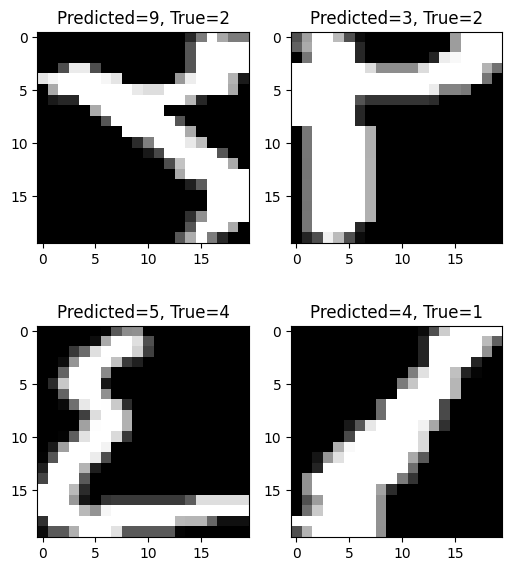

In [149]:
fig = plt.figure(figsize=(6, 7))

rows = 2
columns = 2

for i in range(rows * columns):
    j = np.random.randint(0, len(gaussian_wrong_detected_without_smoothing))
    selected = gaussian_wrong_detected_without_smoothing[j]
    image_index = selected[0]
    image_predicted_label = selected[1]
    image_true_label = selected[2]

    fig.add_subplot(rows, columns, i+1)
    plt.imshow(test_data[image_index], cmap='gray')
    plt.title("Predicted=" + str(image_predicted_label) + ", True=" + str(image_true_label))



#### Gaussian Naive Baise With Smoothing

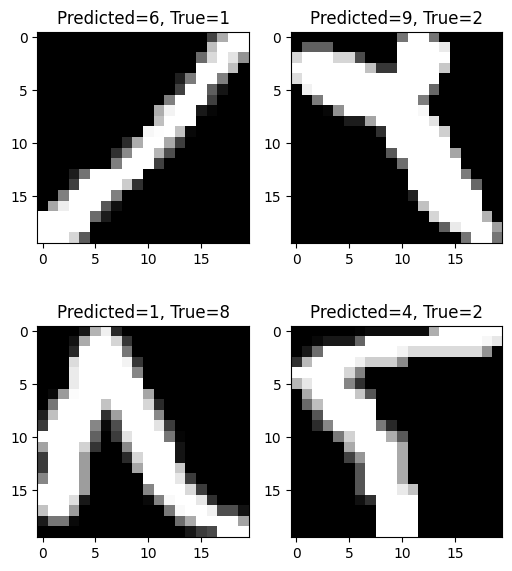

In [150]:
fig = plt.figure(figsize=(6, 7))

rows = 2
columns = 2

for i in range(rows * columns):
    j = np.random.randint(0, len(gaussian_wrong_detected_with_smoothing))
    selected = gaussian_wrong_detected_with_smoothing[j]
    image_index = selected[0]
    image_predicted_label = selected[1]
    image_true_label = selected[2]

    fig.add_subplot(rows, columns, i+1)
    plt.imshow(test_data[image_index], cmap='gray')
    plt.title("Predicted=" + str(image_predicted_label) + ", True=" + str(image_true_label))

#### Bernoulli Naive Baise Without Smoothing

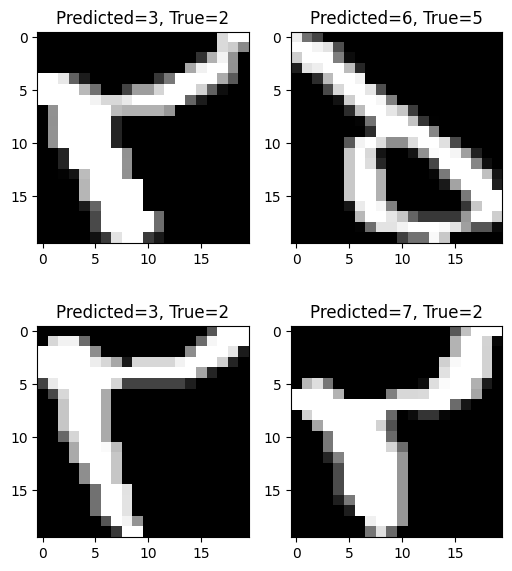

In [151]:
fig = plt.figure(figsize=(6, 7))

rows = 2
columns = 2

for i in range(rows * columns):
    j = np.random.randint(0, len(bernoulli_wrong_detected_without_smoothing))
    selected = bernoulli_wrong_detected_without_smoothing[j]
    image_index = selected[0]
    image_predicted_label = selected[1]
    image_true_label = selected[2]

    fig.add_subplot(rows, columns, i+1)
    plt.imshow(test_data[image_index], cmap='gray')
    plt.title("Predicted=" + str(image_predicted_label) + ", True=" + str(image_true_label))

#### Bernoulli Naive Baise With Smoothing

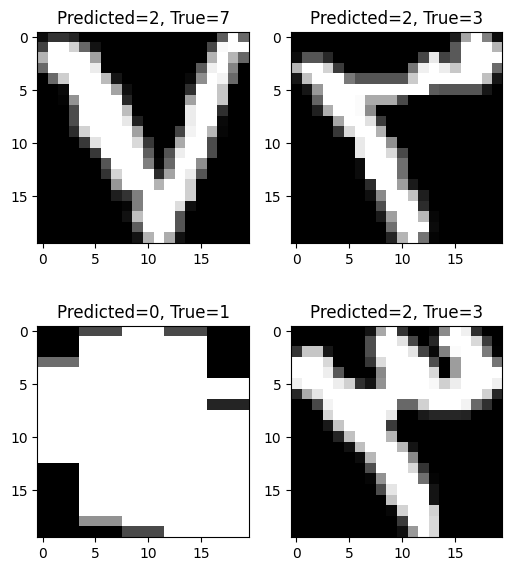

In [153]:
fig = plt.figure(figsize=(6, 7))

rows = 2
columns = 2

for i in range(rows * columns):
    j = np.random.randint(0, len(bernoulli_wrong_detected_with_smoothing))
    selected = bernoulli_wrong_detected_with_smoothing[j]
    image_index = selected[0]
    image_predicted_label = selected[1]
    image_true_label = selected[2]

    fig.add_subplot(rows, columns, i+1)
    plt.imshow(test_data[image_index], cmap='gray')
    plt.title("Predicted=" + str(image_predicted_label) + ", True=" + str(image_true_label))